In [1]:
import brightway2 as bw
import bw2io
import productivity_boosters as prbs
from project_path import ROOT_DIR

In [2]:
bw.projects

Brightway2 projects manager with 14 objects:
	GAC_project
	SsbD_case_studies
	aachen_fast_calculations
	check_PBsmethod
	default
	double_count_electricity
	geminal_atom_catalysts
	geminal_atom_catalysts_v2
	premise_scenarios_ei35
	premisified_scenarios
	premisified_scenarios_cars
	supply chain graph
	test
	trial-SimaPro-import-DME-trucks
Use `projects.report()` to get a report on all projects.

In [3]:
bw.projects.set_current("GAC_project")

In [4]:
bw.databases

Databases dictionary with 3 object(s):
	GAC_project_db
	biosphere3
	ei39cutoff

In [5]:
ipcc_methods = [
    met
    for met in bw.methods
    if "ipcc" in str(met).lower()
    and "2021" in str(met)
    and "no LT" not in str(met)
    and "GWP100" in str(met)
    or (
    "2013" in str(met)
    and "no LT" not in str(met)
    and "GWP100" in str(met)
    )
][:2]
ipcc_methods

[('IPCC 2013', 'climate change', 'global warming potential (GWP100)'),
 ('IPCC 2021', 'climate change', 'global warming potential (GWP100)')]

In [6]:
db_name = "GAC_project_db"

In [7]:
bw.Database(db_name).random()

'1-(naphthalen-1-yl)-1H-imidazole production with heterogeneous Cu/PCN catalyst (10.8 wt% Cu)' (kilogram, GLO, None)

In [8]:
prbs.pretty_lca(
    FUs=[{bw.Database(db_name).random(): 1}],
    methods=ipcc_methods,
)

Duration: 0:00:00.932510


,database,activity name,reference product,unit,location,IPCC 2013 - climate change - global warming potential (GWP100) (kg CO2-Eq),IPCC 2021 - climate change - global warming potential (GWP100) (kg CO2-Eq)
0,GAC_project_db,1-(naphthalen-1-yl)-1H-imidazole production wi...,1-(naphthalen-1-yl)-1H-imidazole,kilogram,GLO,65.14669,70.013595


In [15]:
act = [
    ds
    for ds in bw.Database(db_name)
    # if "Cu/PCN" in ds["name"]
    # if "Cu2O/Altman-Buchwald-ligand" in ds["name"]
    if "1-(naphthalen-1-yl)-1H-imidazole" in ds["name"] and "Cu/PCN" in ds["name"]
    # if "1-(naphthalen-1-yl)-1H-imidazole" in ds["name"]
    # and "Cu2O/Altman-Buchwald-ligand" in ds["name"]
][0]
act

'1-(naphthalen-1-yl)-1H-imidazole production with heterogeneous Cu/PCN catalyst (10.8 wt% Cu)' (kilogram, GLO, None)

In [16]:
exchange_amounts = []
for exc in act.technosphere():
    exc_amount = {exc["input"]: exc["amount"]}
    exchange_amounts.append(exc_amount)
exchange_amounts

[{('GAC_project_db', '139f233e9f82f1b69ce0b24c937534cc'): 1.590303374451379},
 {('ei39cutoff', '0676ac464c63abd8c67741e0d29959b6'): 0.5113382114654694},
 {('GAC_project_db', 'f788e007c820718322032271c4209793'): 0.03129655950036169},
 {('ei39cutoff', 'f77eaf2452afcc8249daafe224142893'): 34.43873407419801}]

In [17]:

df = prbs.pretty_lca(
    FUs=exchange_amounts + [{act: 1}], methods=ipcc_methods, setup_name="contrib"
)
df

Duration: 0:00:00.333508


,database,activity name,reference product,unit,location,IPCC 2013 - climate change - global warming potential (GWP100) (kg CO2-Eq),IPCC 2021 - climate change - global warming potential (GWP100) (kg CO2-Eq)
0,GAC_project_db,1-iodonaphthalene production,1-iodonaphthalene,kilogram,GLO,2.240059,2.169696
1,ei39cutoff,market for imidazole,imidazole,kilogram,GLO,2.829330,2.820805
2,GAC_project_db,"Cu/PCN catalyst production, at 10.8 wt% Cu",Cu/PCN catalyst (10.8 wt% Cu),kilogram,GLO,0.417053,0.283230
3,ei39cutoff,market for dimethyl sulfoxide,dimethyl sulfoxide,kilogram,GLO,50.841678,50.671387
4,GAC_project_db,1-(naphthalen-1-yl)-1H-imidazole production wi...,1-(naphthalen-1-yl)-1H-imidazole,kilogram,GLO,56.328123,55.945120


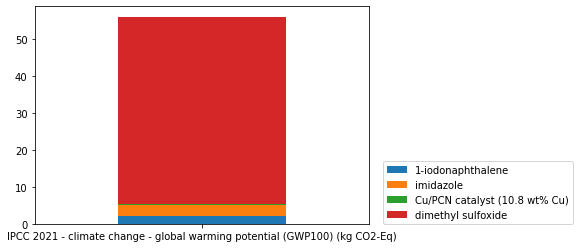

In [18]:
axes = df.drop(labels=["database", "activity name", "unit", "location"], axis=1).set_index(
    "reference product"
).T.iloc[1:, :-1].plot.bar(rot=0, stacked=True)
axes.legend(loc=(1.04, 0));

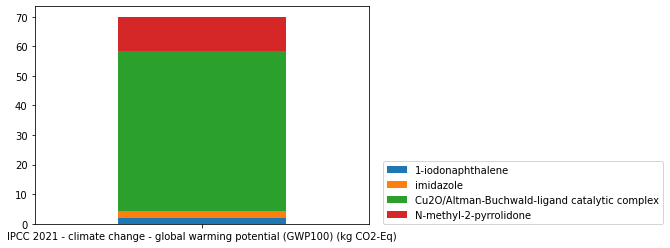

In [14]:
axes = df.drop(labels=["database", "activity name", "unit", "location"], axis=1).set_index(
    "reference product"
).T.iloc[1:, :-1].plot.bar(rot=0, stacked=True)
axes.legend(loc=(1.04, 0));

In [19]:
for exc in act.technosphere():
    exc_amount = 1 * exc["amount"]
    lca = bw.LCA({exc.input: exc_amount}, ipcc_methods[0])
    lca.lci()
    lca.lcia()
    print(exc["input"],":",lca.score)

('GAC_project_db', '139f233e9f82f1b69ce0b24c937534cc') : 2.2400591158249945
('ei39cutoff', '0676ac464c63abd8c67741e0d29959b6') : 2.8293299671632157
('GAC_project_db', 'f788e007c820718322032271c4209793') : 0.41705251700581003
('ei39cutoff', 'f77eaf2452afcc8249daafe224142893') : 50.84167806073569


## Out

In [ ]:
bw2io.export.write_lci_excel(db_name)